# 甜點店的資料科學

Author: Poy Lu

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

## 載入甜點訂單資料

In [3]:
orders_cake = pd.read_csv('orders_cake.csv')

In [4]:
orders_cake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6785 entries, 0 to 6784
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6785 non-null   int64  
 1   customer_id        6785 non-null   int64  
 2   status             6785 non-null   object 
 3   created_at         6785 non-null   int64  
 4   backer_id          4071 non-null   float64
 5   shipto_address     6785 non-null   object 
 6   shipto_state       6785 non-null   object 
 7   shipto_postalcode  6785 non-null   object 
 8   subtotal           6785 non-null   float64
 9   tax                6785 non-null   float64
 10  store_name         6785 non-null   object 
 11  delivery_amount    6785 non-null   float64
 12  order_total        6785 non-null   float64
 13  delivered_at       1428 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 742.2+ KB


In [5]:
orders_cake.head()

,id,customer_id,status,created_at,backer_id,shipto_address,shipto_state,shipto_postalcode,subtotal,tax,store_name,delivery_amount,order_total,delivered_at
0,1,199,Canceled,1398213637,16.0,086 Welch Parkway,TN,29061-3384,1178.50,70.710,UberMelonX,2.67,1251.880,NaN
1,7,153,Delivered,1399374572,241.0,2948 Oak Circle,ND,77402,203.00,12.180,UberFresh,15.46,230.640,1.399442e+09
2,9,647,New,1397009811,103.0,8 Sheridan Point,CO,80423-6650,73.75,4.425,UberFresh,14.88,93.055,NaN
3,10,301,Canceled,1399081836,68.0,24689 Jackson Alley,AK,96607,15.00,0.900,UberMelon,8.09,23.990,NaN
4,11,526,Out for Delivery,1395023633,NaN,9 Dryden Parkway,MD,14153,68.75,4.125,UberFresh,15.41,88.285,NaN


In [6]:
orders_cake['created_at'] = pd.to_datetime(orders_cake['created_at'], unit='s') + pd.DateOffset(years=6)
# orders_cake['created_at'].head()
orders_cake = orders_cake.set_index('created_at')
orders_cake.head()

,id,customer_id,status,backer_id,shipto_address,shipto_state,shipto_postalcode,subtotal,tax,store_name,delivery_amount,order_total,delivered_at
created_at,,,,,,,,,,,,,
2020-04-23 00:40:37,1,199,Canceled,16.0,086 Welch Parkway,TN,29061-3384,1178.50,70.710,UberMelonX,2.67,1251.880,NaN
2020-05-06 11:09:32,7,153,Delivered,241.0,2948 Oak Circle,ND,77402,203.00,12.180,UberFresh,15.46,230.640,1.399442e+09
2020-04-09 02:16:51,9,647,New,103.0,8 Sheridan Point,CO,80423-6650,73.75,4.425,UberFresh,14.88,93.055,NaN
2020-05-03 01:50:36,10,301,Canceled,68.0,24689 Jackson Alley,AK,96607,15.00,0.900,UberMelon,8.09,23.990,NaN
2020-03-17 02:33:53,11,526,Out for Delivery,NaN,9 Dryden Parkway,MD,14153,68.75,4.125,UberFresh,15.41,88.285,NaN


### 甜點每日營收統計

<AxesSubplot:xlabel='created_at'>

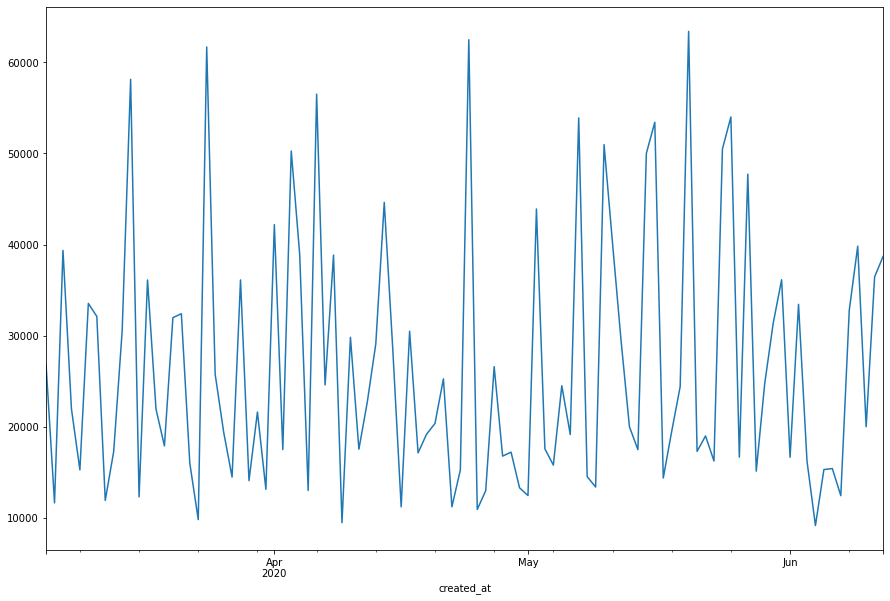

In [7]:
orders_cake['order_total'].resample('1d').sum().plot()

## 載入地圖資料

下載內政部臺灣地圖資料: [直轄市、縣市界線](https://data.gov.tw/related/datasets/7441)

In [8]:
town_shp = gpd.read_file('COUNTY_MOI_1090820.shp', encoding='utf-8')

In [9]:
# print(orders_cake['shipto_state'].str.get(0).value_counts())
# print(set(orders_cake['shipto_state'].str.get(0).unique()) - set(town_shp['COUNTYID'].unique()))
# {'L', 'S', 'R'}
# print(set(town_shp['COUNTYID'].unique()) - set(orders_cake['shipto_state'].str.get(0).unique()))
# {'J', 'E', 'Z', 'X', 'B', 'Q'}
# => {L: E, S: B, R: Q}
orders_cake['shipto_state'] = orders_cake['shipto_state'].str.get(0)
orders_cake['shipto_state'] = orders_cake['shipto_state'].replace({'L': 'E', 'S': 'B', 'R': 'Q'})

In [10]:
orders_cake.head()

,id,customer_id,status,backer_id,shipto_address,shipto_state,shipto_postalcode,subtotal,tax,store_name,delivery_amount,order_total,delivered_at
created_at,,,,,,,,,,,,,
2020-04-23 00:40:37,1,199,Canceled,16.0,086 Welch Parkway,T,29061-3384,1178.50,70.710,UberMelonX,2.67,1251.880,NaN
2020-05-06 11:09:32,7,153,Delivered,241.0,2948 Oak Circle,N,77402,203.00,12.180,UberFresh,15.46,230.640,1.399442e+09
2020-04-09 02:16:51,9,647,New,103.0,8 Sheridan Point,C,80423-6650,73.75,4.425,UberFresh,14.88,93.055,NaN
2020-05-03 01:50:36,10,301,Canceled,68.0,24689 Jackson Alley,A,96607,15.00,0.900,UberMelon,8.09,23.990,NaN
2020-03-17 02:33:53,11,526,Out for Delivery,NaN,9 Dryden Parkway,M,14153,68.75,4.125,UberFresh,15.41,88.285,NaN


In [11]:
data_shipto_state_cnt = orders_cake.groupby('shipto_state')['id'].count()
data_shipto_state_cnt.name = 'ship_to_county'

In [12]:
town_shp_shipto_state_cnt = pd.merge(town_shp, data_shipto_state_cnt, how='inner', left_on='COUNTYID', right_index=True)

### 訂單送貨地點分布

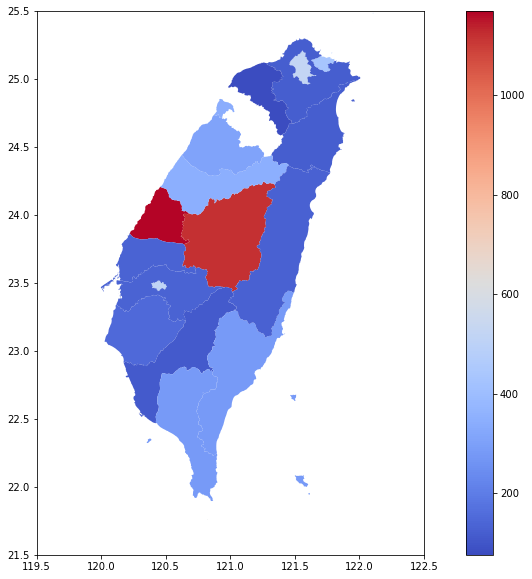

In [13]:
town_shp_shipto_state_cnt.plot(
    column='ship_to_county',
    cmap='coolwarm', 
    legend=True
)
plt.axis([119.5, 122.5, 21.5, 25.5])
plt.show()